In [20]:
from keras.datasets import mnist
data = mnist.load_data()

In [22]:
(X_train, y_train), (X_test, y_test) = data
X_train[0].shape
X_train.shape

(60000, 28, 28)

In [23]:
import numpy as np
outputs = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
weights = [np.random.random((28, 28)) for i in outputs]
print(weights[0][0][0])

0.6410310119195188


In [31]:
X_train_np = np.array(X_train)/255
X_test_np = np.array(X_test)/255
X_train_np[0][14][14]

0.9411764705882353

In [124]:
max_pred = 28*28
def predict_one(weight, input):
    output = weight * input
    return np.sum(output/max_pred)
predict_one(weights[0], X_train_np[0])

60000

In [142]:
from copy import copy, deepcopy
from tqdm import tqdm
training_weights = deepcopy(weights)
alpha = 0.1
for times in tqdm(range(100)):
    for input_count in range(len(X_train)):
        for number_i in range(len(outputs)):
            input = X_train_np[input_count]
            output = y_train[input_count]
            number_weight = training_weights[number_i]
            prediction = predict_one(number_weight, input)
            expected = 1 if output == outputs[number_i] else 0
            error = (expected - prediction)**2
            delta = expected - prediction
            weight_delta = input * delta * alpha
            training_weights[number_i] = number_weight + weight_delta
#            for i in range(len(number_weight)):
#                for j in range (len(number_weight[i])):
#                    new_weight = delta * (input[i][j]) * alpha
#                    # print(input[i][j])
#                    # print(number_weight[i][j], new_weight)
#                    number_weight[i][j] += new_weight
            # print('error =>', error, 'prediction =>', prediction,'expected =>', expected)
        # print('-'*20)

100%|███████████████| 100/100 [19:57<00:00, 11.98s/it]


In [126]:
y_train[1]
predict_one(training_weights[5], X_train_np[1])

-0.05123147691529801

In [127]:
def predict_digit(image, weights):
    probabilities = []
    for i in range(10):
        probabilities.append(predict_one(weights[i], image))
    return probabilities.index(max(probabilities))

In [128]:
predict_digit(X_train_np[1], training_weights)

0

  0%|                       | 0/60000 [00:00<?, ?it/s]

3


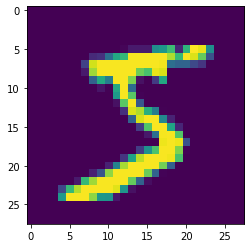

  0%|             | 24/60000 [00:00<04:10, 239.83it/s]

9


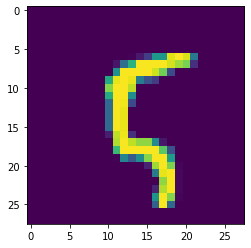

1


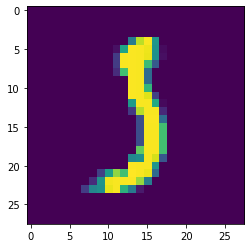

  0%|            | 133/60000 [00:00<01:55, 518.99it/s]

0


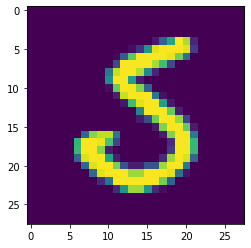

8


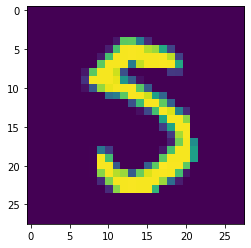

100%|████████| 60000/60000 [00:05<00:00, 10023.81it/s]

50013 9987
accuracy 83.355


In [141]:
import matplotlib.pyplot as plt
correct = 0
incorrect = 0
wrongs = np.array(9)
exp_pre = []
wrongs = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
limit = 5
for i in tqdm(range(len(y_train))):
    prediction = predict_digit(X_train_np[i], training_weights)
    if prediction == y_train[i]:
        correct += 1
    else:
        incorrect += 1
        exp_pre.append([y_train[i], prediction])
        wrongs[y_train[i]] += 1
        if y_train[i] == 5 and limit > 0:
            limit -= 1
            plt.imshow(X_train[i])
            print(prediction)
            plt.show()
            
print(correct, incorrect)
print('accuracy', 100 * correct/ (correct + incorrect))
#100 time for 100 data accuracy - 67.09, time - 1:04
#100 time for 1000 data accuracy - 80.7, time - 10:12
#100 time for 5000 data accuracy - 83.6, time - 47:24
#100 time for 5000 data accuracy - 83.6, time - 01:22
#100 time for 10000 data accuracy - 83.355, time - 02:41
#100 time for #all data accuracy - 83.355, time - 19.57

In [136]:
print(wrongs)

[273, 270, 1258, 1012, 869, 2252, 449, 919, 1453, 1232, 0]


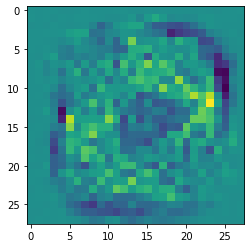

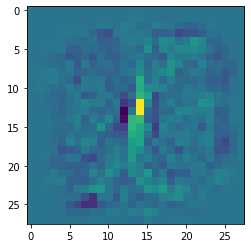

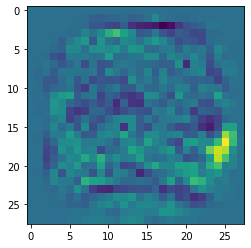

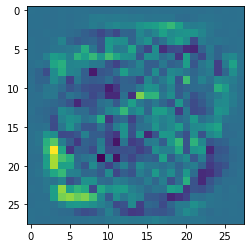

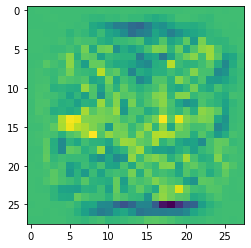

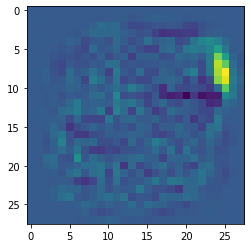

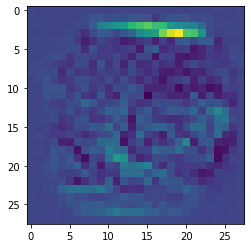

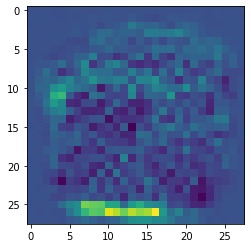

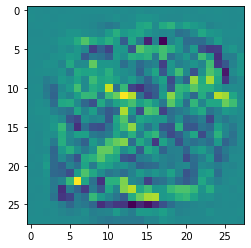

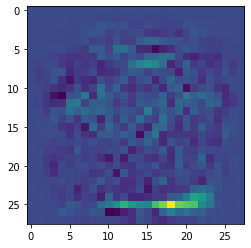

In [130]:
import matplotlib.pyplot as plt
for i in range(10):
    plt.imshow(training_weights[i])
    plt.show()

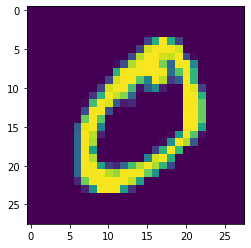

In [293]:
plt.imshow(X_train[1])

In [294]:
!pwd

/Users/tnluser/BYJUS/temp/experiments
